In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd

## API Bağlantısının Yapılması

In [2]:
import tweepy,codecs

In [3]:
# keys

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

## Hashtag Analizi

In [5]:
# trends available

In [6]:
api.trends_available()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [30]:
# ulke kodu lazım olacak...

In [31]:
def ulke_woeid(country):
    places = api.trends_available()
    
    return [place['woeid'] for place in places if place['name'].lower() == country][0]


In [32]:
# run

In [33]:
turkey_woeid = ulke_woeid('turkey')

In [34]:
# turkiyedeki trendler

In [35]:
trendler = api.trends_place(id = turkey_woeid)

In [41]:
# print

In [36]:
import json

In [40]:
print(json.dumps(trendler ,indent=4))

[
    {
        "trends": [
            {
                "name": "#SunatullahSaadatTutuklans\u0131n",
                "url": "http://twitter.com/search?q=%23SunatullahSaadatTutuklans%C4%B1n",
                "promoted_content": null,
                "query": "%23SunatullahSaadatTutuklans%C4%B1n",
                "tweet_volume": 36923
            },
            {
                "name": "#Afganlar\u0131Almay\u0131n",
                "url": "http://twitter.com/search?q=%23Afganlar%C4%B1Almay%C4%B1n",
                "promoted_content": null,
                "query": "%23Afganlar%C4%B1Almay%C4%B1n",
                "tweet_volume": 72372
            },
            {
                "name": "#pazartesi",
                "url": "http://twitter.com/search?q=%23pazartesi",
                "promoted_content": null,
                "query": "%23pazartesi",
                "tweet_volume": 11352
            },
            {
                "name": "#AlexTeixeira",
                "url": "http://t

In [42]:
# print better

In [43]:
trends = trendler[0]['trends']

In [44]:
for t in trends:
    print(t['name'])

#SunatullahSaadatTutuklansın
#AfganlarıAlmayın
#pazartesi
#AlexTeixeira
#paribu
Naber
Tanju Özcan
Muharrem
GRATEFUL FOR MC HYUNJIN
SOLO 700M VIEWS
Şükrü Sözen
13 PKK'lı
TBZ MOST THRILL-ING COMEBACK
Islam
Mekke'den Medine'ye
Seçenek 1
Taliban
Günaydınn
Van Gölü'nde
Cornelius
lgs 2
Ryan
Özrünü
Hicret
Getir
Nakil Sonuçları Açıklandı
Kaplan
Namjoon
Rojbaş
Yunanistan
Cenab
Alperen Şengün
Özer
9 Ağustos
Burhan Kuzu
Yüce Allah'tan
Bismillah
Ülkemize
Hüseyin
Army
mübarek olsun
Benim Kelime Dağarcık Puanım
Sınır
S.A.V
#HelpGreece
#dgs2021
#HicriYılbaşı
#ÇözümAKPsizTürkiye
#fenerbahcetoken
#DünyaKitapSeverlerGünü


### Hashtag'den Veri Çekmek

In [48]:
# veri çekimi

In [45]:
tweets = api.search(q='#pazartesi',
                    lang='tr',
                    result_type = 'recent',
                    count=1000)

In [49]:
# to df

In [122]:
def tweets_to_df(results):
    data = [[tw.id,
           tw.text,
           tw.created_at,
           tw.retweet_count,
           tw.source,
           tw.author.screen_name,
           tw.author.followers_count,
           tw.author.location,
           tw.entities.get('hashtags')] for tw in results]
    
    columns = ['id','text','created_at','retweet_count','source','user_screen_name','user_followers_count','user_location','Hashtags']
    
    return pd.DataFrame(data,columns=columns)

In [123]:
df = tweets_to_df(tweets)

### Hashtag Betimlemek
bir hashtag'in önemliliğini kaç unique kullanıcı katıldığı belirtebilir..

In [124]:
# normal

In [125]:
df.shape

(4, 9)

In [126]:
# unique

In [127]:
df.user_screen_name.unique().size

2

In [128]:
# en çok katkı sağlayanlar

In [129]:
df.groupby('user_screen_name').count()['id'].sort_values(ascending=False)[:5]

user_screen_name
KirkDBorne    3
dataiku       1
Name: id, dtype: int64

#### Özgün katkı
Bir kişinin tweetinde kendine ait cümleleriyle belirtmesine denir.  <br>

Bu durumu atılan tweet'in ****RT içermesi**** üzerinden hesaplayabiliriz...  <br>

Bir tweet RT içeriyorsa başka bir ****tweet'i alıntılanarak**** tweet atışmıştır..

In [130]:
rt_includes = df['text'].str.startswith('RT')

In [131]:
# özgün olanlar

In [132]:
df[~rt_includes].shape[0]

4

In [133]:
# olmayanlar

In [134]:
df[rt_includes].shape[0]

0

In [135]:
# özgün oranı

In [136]:
df[~rt_includes].shape[0] / df.shape[0]

1.0

In [137]:
# en cok fav-retweet

In [138]:
df.sort_values('retweet_count',ascending=False).head()

,id,text,created_at,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags
0,1424133248704290824,[New Book] “#DataScience for #Economics and #F...,2021-08-07 22:20:00,104,TweetDeck,KirkDBorne,278912,"Maryland, USA","[{'text': 'DataScience', 'indices': [12, 24]},..."
2,1424109089349537793,Download Free eBook (47-page PDF) — The #Mathe...,2021-08-07 20:44:00,55,TweetDeck,KirkDBorne,278912,"Maryland, USA","[{'text': 'Mathematics', 'indices': [40, 52]}]"
1,1424389184966381575,[FREE e-Book] Learn Classification &amp; Regre...,2021-08-08 15:17:00,50,TweetDeck,KirkDBorne,278912,"Maryland, USA","[{'text': 'BigData', 'indices': [96, 104]}]"
3,1423133834208550912,"Big news: Today, we’re excited to announce a $...",2021-08-05 04:08:41,38,HubSpot,dataiku,20710,"New York, NY","[{'text': 'SeriesE', 'indices': [58, 66]}]"


### Tweet-Saat Dağılımı

In [139]:
tweets = api.search(q='#datascience',lang='en',count=500,result_type='popular')

In [140]:
df = tweets_to_df(tweets)

In [141]:
df.shape

(4, 9)

In [142]:
# created_at'den saat çekimi

In [143]:
df['tweet_saati'] = df['created_at'].apply(lambda x : x.strftime('%H'))

In [144]:
df.head()

,id,text,created_at,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_saati
0,1424133248704290824,[New Book] “#DataScience for #Economics and #F...,2021-08-07 22:20:00,104,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'DataScience', 'indices': [12, 24]},...",22
1,1424389184966381575,[FREE e-Book] Learn Classification &amp; Regre...,2021-08-08 15:17:00,52,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'BigData', 'indices': [96, 104]}]",15
2,1424109089349537793,Download Free eBook (47-page PDF) — The #Mathe...,2021-08-07 20:44:00,55,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'Mathematics', 'indices': [40, 52]}]",20
3,1423133834208550912,"Big news: Today, we’re excited to announce a $...",2021-08-05 04:08:41,38,HubSpot,dataiku,20710,"New York, NY","[{'text': 'SeriesE', 'indices': [58, 66]}]",04


In [145]:
# tweet_saati to numeric

In [146]:
df.tweet_saati = pd.to_numeric(df.tweet_saati)

In [147]:
# displot

In [148]:
import seaborn as sns

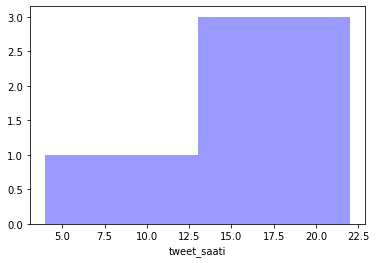

In [149]:
sns.distplot(df.tweet_saati  , kde=False,color='blue');

In [150]:
# gunler

In [151]:
df['gunler'] = df.created_at.dt.day_name()

In [152]:
df.head()

,id,text,created_at,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_saati,gunler
0,1424133248704290824,[New Book] “#DataScience for #Economics and #F...,2021-08-07 22:20:00,104,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'DataScience', 'indices': [12, 24]},...",22,Saturday
1,1424389184966381575,[FREE e-Book] Learn Classification &amp; Regre...,2021-08-08 15:17:00,52,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'BigData', 'indices': [96, 104]}]",15,Sunday
2,1424109089349537793,Download Free eBook (47-page PDF) — The #Mathe...,2021-08-07 20:44:00,55,TweetDeck,KirkDBorne,278914,"Maryland, USA","[{'text': 'Mathematics', 'indices': [40, 52]}]",20,Saturday
3,1423133834208550912,"Big news: Today, we’re excited to announce a $...",2021-08-05 04:08:41,38,HubSpot,dataiku,20710,"New York, NY","[{'text': 'SeriesE', 'indices': [58, 66]}]",4,Thursday


In [153]:
# groupby

In [154]:
days_fq = df.groupby('gunler').count()['id']

In [155]:
days_fq

gunler
Saturday    2
Sunday      1
Thursday    1
Name: id, dtype: int64

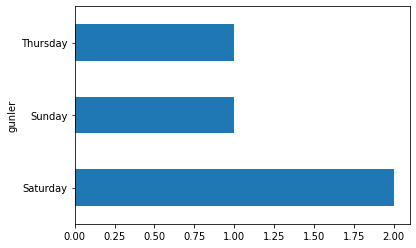

In [156]:
days_fq.plot.barh();

In [157]:
# cihazlar

In [158]:
source_fq = df.groupby('source').count()['id']

In [159]:
source_fq

source
HubSpot      1
TweetDeck    3
Name: id, dtype: int64

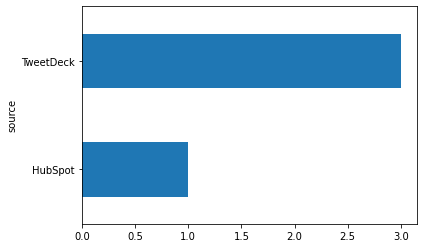

In [160]:
source_fq.plot.barh();